## Método de la secante
### Descripción
El método de la secante es un método numérico para encontrar las raíces de una función de forma iterativa. Este método es similar al método de Newton-Raphson, pero en lugar de usar la derivada de la función, se aproxima la derivada con una diferencia finita.

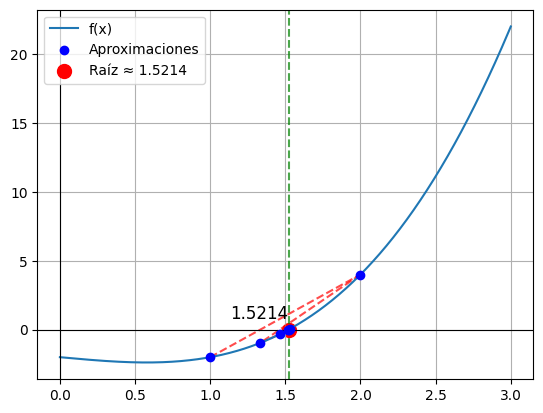

Raíz aproximada: 1.5213763166697438
La raíz de la función x**3 - x - 2 es: 1.5213763166697438


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def metodo_secante(funcion_str, x0, x1, tol=1e-6, max_iter=10):
    """
    Método de la secante para encontrar raíces de una función.
    Muestra gráficamente la aproximación de la solución con rectas secantes.
    
    Parámetros:
    funcion_str -- función en forma de string
    x0, x1 -- valores iniciales
    tol -- tolerancia para la convergencia
    max_iter -- número máximo de iteraciones
    """
    x = sp.symbols('x')
    f_expr = sp.sympify(funcion_str)
    f = sp.lambdify(x, f_expr, 'numpy')

    x_vals = [x0, x1]
    y_vals = [f(x0), f(x1)]

    for i in range(max_iter):
        fx0, fx1 = f(x0), f(x1)
        
        if abs(fx1) < tol:
            break

        # Fórmula del método de la secante
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)

        x_vals.append(x2)
        y_vals.append(f(x2))

        # Graficar la recta secante
        x_range = np.linspace(x0, x1, 100)
        secante = fx0 + (fx1 - fx0) / (x1 - x0) * (x_range - x0)
        plt.plot(x_range, secante, 'r--', alpha=0.7)

        x0, x1 = x1, x2

    # Graficar la función
    x_range = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 400)
    plt.plot(x_range, f(x_range), label='f(x)')
    plt.scatter(x_vals, y_vals, color='blue', zorder=3, label='Aproximaciones')

    root = x_vals[-1]
    plt.axvline(root, color='green', linestyle='--', alpha=0.7)
    plt.scatter(root, 0, color='red', s=100, label=f"Raíz ≈ {root:.4f}")
    plt.text(root, 0.5, f"{root:.4f}", fontsize=12, verticalalignment='bottom', horizontalalignment='right')

    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0, color='black', linewidth=0.8)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Raíz aproximada: {root}")
    return root

# Interfaz de usuario
funcion = input("Ingrese la función en términos de x: ")
x0 = float(input("Ingrese el primer valor inicial x0: "))
x1 = float(input("Ingrese el segundo valor inicial x1: "))
tolerancia = float(input("Ingrese la tolerancia: "))
max_iter = int(input("Ingrese el número máximo de iteraciones: "))

raiz = metodo_secante(funcion, x0, x1, tolerancia, max_iter)
print(f"La raíz de la función {funcion} es: {raiz}")